## **Simple Linear Regression**

     

In this notebook, I ran Simple linear and Multivariate linear regression using a two simple dataset (in CSV format) from kaggle.

In [1]:
import pandas as pd
df=pd.read_csv('canada_per_capita_income.csv')
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [2]:
df1=df.rename (columns= {'per capita income (US$)':'income'})
df1.head(5)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Plotting the data provides a better visual grasp of the data through time.

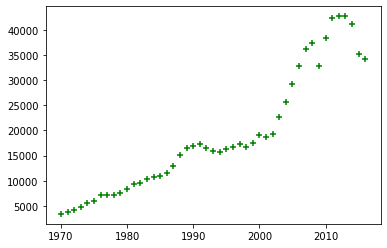

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df1.year,df1.income,color='g',marker='+')
plt.show()

Our dependent and independent variables are passed to the linear regression model, which is imported from the sklearn package.

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df1[['year']],df1.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the income for 2020 by using the model.predict function and by using simple linear regression formula $y=mx+c$ where,

M is the slope or coefficient,

c is the intercept.

In [5]:
model.coef_

array([828.46507522])

In [6]:
model.intercept_

-1632210.7578554575

In [7]:
t=828.46507522*2020-1632210.7578554575
t

41288.694088942604

In [8]:
model.predict([[2020]])

array([41288.69409442])

## **Multivariate Linear Regression**

In [9]:
import pandas as pd
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Filling the nan values in experience column with zero in words.

In [10]:
df.experience=df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5581 sha256=1c87e064fcc533e4f66ef995c3800e1388299deefbbc7cf2c6ef41083a3d29cb
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [12]:
from word2number import w2n

In [13]:
x=len(df.experience)
x

8

Converting numbers in words to interger with help of w2n function and appending it in a variable.  

In [14]:
y=[]
for i in range(x):
  z=w2n.word_to_num(df.experience[i])
  print(z)
  y.append(z)
  

0
0
5
2
7
3
10
11


In [15]:
y

[0, 0, 5, 2, 7, 3, 10, 11]

In [16]:
df.experience=y
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


Filling the nan values in test_score(out of 10) with its median value.

In [17]:
a=df['test_score(out of 10)'].median()
a

8.0

In [18]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(a)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


Creating, fitting and predicting using linear regression model for a multiple independent variable. 

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [20]:
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.predict([[2,9,6]])

array([53205.96797671])

In [22]:
model.predict([[12,10,10]])

array([92002.18340611])